/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


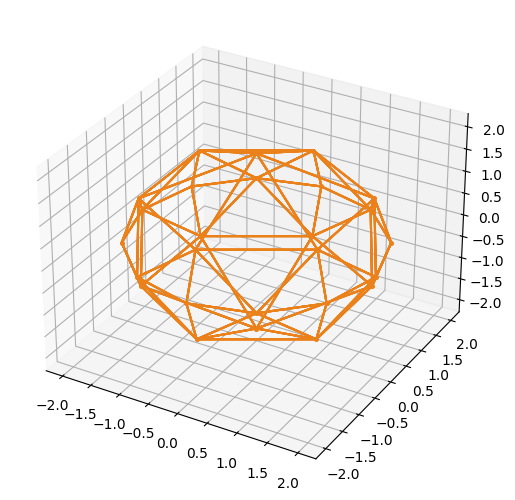

In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider
from lsm import HNdC_ijk

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from ddgclib._complex import Complex
from ddgclib import *
from ddgclib._complex import *
from ddgclib._curvatures import * #plot_surface#, curvature
from ddgclib._capillary_rise_flow import * #plot_surface#, curvature
from ddgclib._hyperboloid import *
from ddgclib._catenoid import *
from ddgclib._ellipsoid import *
from ddgclib._eos import *
from ddgclib._misc import *
from ddgclib._plotting import *
from ddgclib._sphere import *
#from ddgclib._case2 import *

# Numerical parameters #Stated this is what to pla
N = 7  # Determines mesh incidence
refinement = 1

r = 2  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()

# Plot conforimation
if 0:
    ps = plot_polyscope(HC, vector_field=None, scalar_field=None, fn='', up="x_up"
                        , stl=False)
    ps.show()

/home/endres/projects/ddg/ddgclib/ddgclib/_complex.py:2832: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.fig_complex.show()


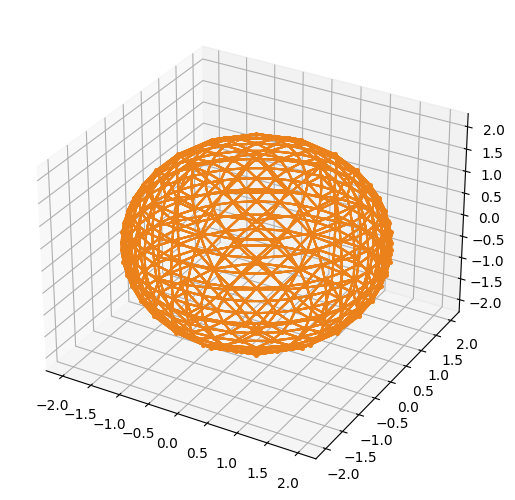

In [2]:
refinement = 3

r = 2  # analytical area = 2 pi r**2, so take 2 pi
HC = sphere_from_cap(r, N=N, refinement=refinement)


if 1:
    HC.plot_complex()
    plt.show()


In [3]:
# Compute the curvature
HNdA_i = []  # total HNdA_i at vertex i
A_ijk = []  # total HNdA_i for edge ij
C_ij = []
alpha_ij = []
NdA_i = []

for v in HC.V:
    #print(f'v.index = {v.index}')
    N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
    N_f0 = normalized(N_f0)[0]
    F, nn = vectorise_vnn(v)
    # Compute discrete curvatures
    c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
    # Append lists
    c_outd['HNdA_ij']
    HNdA_i.append(c_outd['HNdA_i'])
    C_ij.append(c_outd['C_ij'])
    alpha_ij.append(c_outd['alpha_ij'])
    A_ijk.append(c_outd['A_ijk'])
    #print(f'N_f0 dot = {N_f0}')
    np.dot(N_f0, c_outd['HNdA_i'])
    NdA_i.append(c_outd['NdA_i'])
    
   # print(f"np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij']) = {np.dot(N_f0, c_outd['HNdA_i'])/np.sum(c_outd['C_ij'])}")

# [0]
# HNdA_i = 0.5 * np.sum(HNdA_ij, axis=0)
# HN_i = np.sum(HNdA_i) / np.sum(C_ij)
#HNdA_ij, HN_i, HNdA_i, C_ij, alpha_ij
print(f'np.sum(HNdA_i, axis=0) = {np.sum(HNdA_i, axis=0)}')
#print(f'HNdA_i[0] = {HNdA_i[0]}')
#print(f'nn = {nn}')
#print(f'F= {F}')
NdA_i = np.array(NdA_i)
print(f'NdA_i = {NdA_i}')



np.sum(HNdA_i, axis=0) = [-9.48676901e-20  3.38813179e-19 -2.50721752e-19]
NdA_i = [[ 0.00000000e+00  0.00000000e+00 -8.11898816e-01]
 [-1.34621770e-18  3.82359556e-02  0.00000000e+00]
 [ 3.31133089e-02  1.91179778e-02  0.00000000e+00]
 ...
 [-5.81531877e-02  6.74100545e-02  2.39812004e-02]
 [-5.30235461e-02  5.52887406e-02  1.01962433e-02]
 [-4.59388924e-02  6.63886701e-02  1.08005842e-02]]


# Theoretical areas tested:

### Discrete dual area

The scalar value of the dual areas taken from :

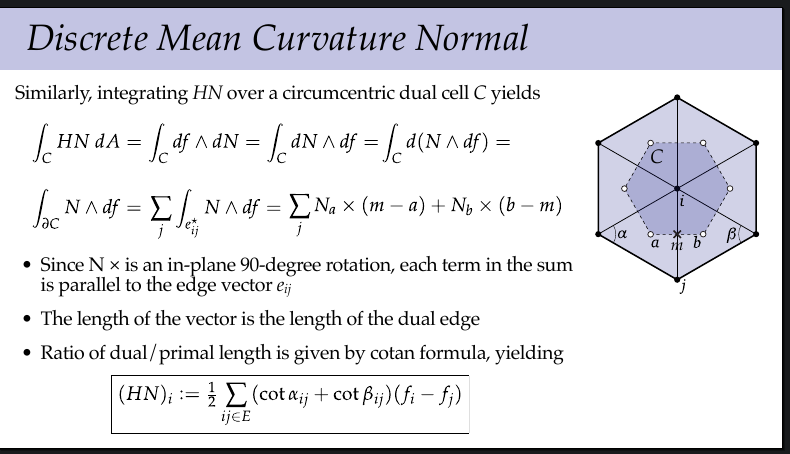


### Discrete vector area

The summed vector area:

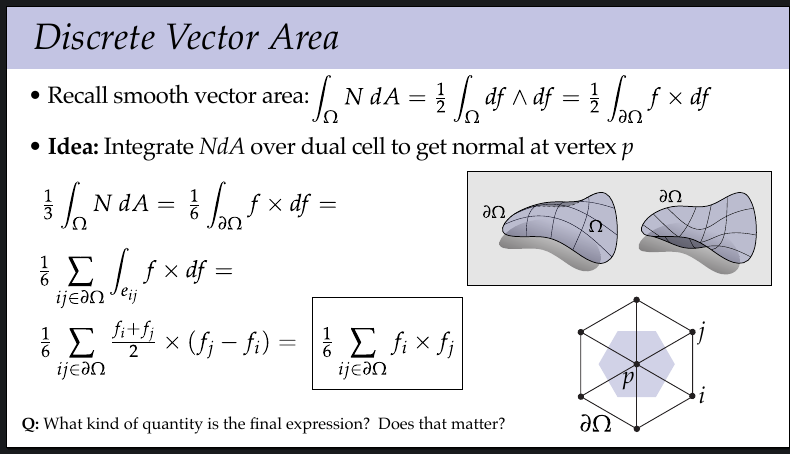


### Angle defect (area on a unit sphere)

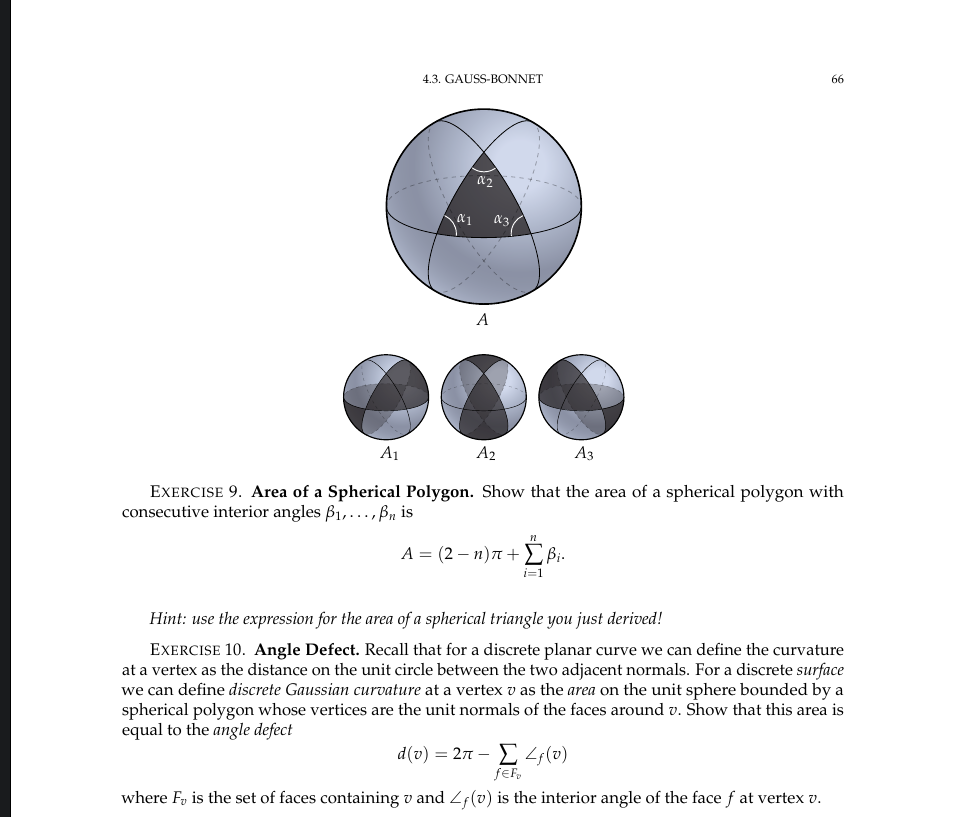

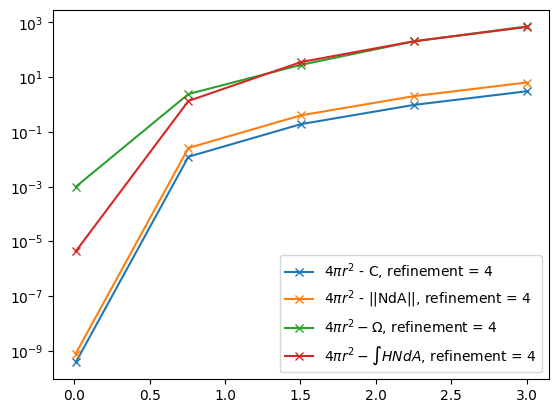

In [7]:
labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
plt.semilogy(r_range, np.abs(C_list), 'x-', label=labstr)
labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
plt.semilogy(r_range, np.abs(NdA_list), 'x-', label=labstr)
labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
plt.semilogy(r_range, np.abs(Omega_list), 'x-', label=labstr)
labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
plt.semilogy(r_range, np.abs(int_hndA_list), 'x-', label=labstr)
plt.legend()
plt.show()

In [8]:
4*np.pi*r**2, C, np.sum(np.linalg.norm(NdA_i, axis=1)), np.sum(Omega_i), int_hndA

(113.09733552923255,
 112.66671827187164622,
 112.19558067132385347,
 12.566370614358796246,
 [array([ 2.08166817e-17, -1.63064007e-16,  8.49185576e-01]),
  array([-2.57013720e-17,  3.82652850e-03,  6.50521303e-19]),
  array([3.31387089e-03, 1.91326425e-03, 5.79962655e-17]),
  array([ 3.31387089e-03, -1.91326425e-03, -3.03913456e-18]),
  array([-8.71698547e-17, -3.82652850e-03,  2.79213924e-18]),
  array([-3.31387089e-03, -1.91326425e-03,  7.13304410e-17]),
  array([-3.31387089e-03,  1.91326425e-03, -3.31622096e-18]),
  array([ 0.0020805 , -0.00237577, -0.00308059]),
  array([ 1.00475664e-03, -2.07958771e-03, -1.26084168e-17]),
  array([2.13141318e-03, 9.19403442e-17, 1.94046080e-18]),
  array([-9.54097912e-18, -2.58726112e-03, -2.45077257e-03]),
  array([-1.00475664e-03, -2.07958771e-03,  1.23599048e-17]),
  array([ 0.00057619,  0.00281205, -0.0026052 ]),
  array([-1.06570659e-03,  1.84585796e-03,  1.12757026e-17]),
  array([ 1.00475664e-03,  2.07958771e-03, -1.95156391e-17]),
  array

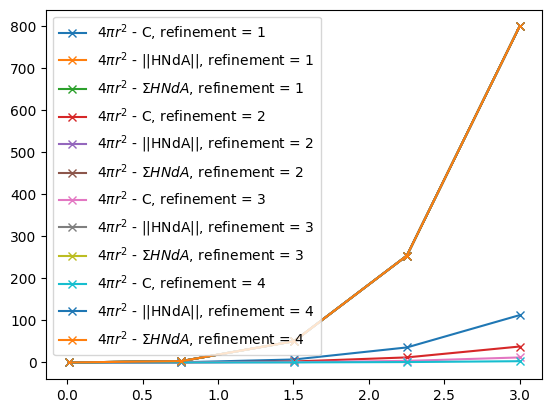

In [27]:
from matplotlib import pyplot as plt

refinement = 2
refinement_list = [1, 2, 3, 4]
#refinement_list = [2]
r_range = np.linspace(1e-2, 3, 5)
for refinement in refinement_list:
    C_list = []
    n_hndA_list = []
    s_hndA_list = []
    int_hndA_list = []
    NdA_list = []
    Omega_list = []
    for r in r_range:
        # Start main loop
        HC = sphere_from_cap(r, N=N, refinement=refinement)
        HNdA_ijk_l, C_ijk_l = [], []
        int_hndA = []
        C = 0
        HNdA = np.zeros(3)
        for v in HC.V:
            n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            n_i = normalized(n_i)[0]  
            n_test = n_i + (np.random.rand(3) - 0.5)
            HNdA_i, C_i = hndA_i(v, n_i=n_test)
            v.hnda_i = HNdA_i
            C += C_i
            HNdA += HNdA_i
            #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
            #break
        for v in HC.V:
            int_HNdA_i, C_i = int_hndA_i(v, n_i=None)
            #int_HNdA_i =-np.array(int_HNdA_i)
            int_hndA.append(int_HNdA_i)

        int_hndA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(int_hndA, axis=1)))/4*np.pi*r**2)
        n_hndA_list.append((4*np.pi*r**2 - np.linalg.norm(HNdA))/4*np.pi*r**2)
        s_hndA_list.append((4*np.pi*r**2 - np.sum(HNdA))/4*np.pi*r**2)
        # Compute the curvature
      #  HNdA_i = []  # total HNdA_i at vertex i
        A_ijk = []  # total HNdA_i for edge ij
        C_ij = []
        alpha_ij = []
        NdA_i = []
        Omega_i = []
        for v in HC.V:
            #print(f'v.index = {v.index}')
            N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            N_f0 = normalized(N_f0)[0]
            F, nn = vectorise_vnn(v)
            # Compute discrete curvatures
            c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            # Append lists
          #  c_outd['HNdA_ij']
          #  HNdA_i.append(c_outd['HNdA_i'])
            C_ij.append(c_outd['C_ij'])
            alpha_ij.append(c_outd['alpha_ij'])
            A_ijk.append(c_outd['A_ijk'])
            #print(f'N_f0 dot = {N_f0}')
          #  np.dot(N_f0, c_outd['HNdA_i'])
            NdA_i.append(c_outd['NdA_i'])
            Omega_i.append(2 * np.pi - np.sum(c_outd['Theta_i_jk']))


        NdA_i = np.array(NdA_i)
        C_list.append((4*np.pi*r**2 - C)/4*np.pi*r**2)
        NdA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(NdA_i, axis=1)))/4*np.pi*r**2)
        Omega_list.append((4*np.pi*r**2 - np.sum(Omega_i))/4*np.pi*r**2)
        

    labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
    plt.plot(r_range, C_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - ||HNdA||' + f', refinement = {refinement}'
    plt.plot(r_range, hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - $\Sigma HNdA$' + f', refinement = {refinement}'
    plt.plot(r_range, hndA_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
    #plt.plot(r_range, NdA_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
    #plt.plot(r_range, Omega_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
    #plt.plot(r_range, int_hndA_list, 'x-', label=labstr)
    plt.legend()

plt.show()

In [20]:
C_list, hndA_list

([3.7578444784277501096e-10,
  0.012372838698823050897,
  0.19279013267578169269,
  0.96738199744207086596,
  3.0438540275265166708],
 [9.869604401089153e-08,
  3.249602903390097,
  50.634408977445574,
  254.0732506174271,
  799.4379564882372])

In [21]:
C, NdA_i

(112.66671827187164622,
 array([[ 0.00000000e+00,  0.00000000e+00, -9.43832374e-01],
        [-1.98770398e-19,  2.09196001e-02,  0.00000000e+00],
        [ 1.81169051e-02,  1.04598000e-02,  0.00000000e+00],
        ...,
        [-4.62888350e-02, -1.69493648e-02,  1.63666179e-02],
        [-4.04680738e-02, -3.51381198e-02,  2.18915172e-02],
        [-5.06645413e-02, -1.74773201e-02,  2.18915172e-02]],
       dtype=float128))

In [25]:
4*np.pi*r**2, C, np.sum(np.linalg.norm(NdA_i, axis=1)), np.sum(Omega_i), int_hndA

(113.09733552923255,
 112.66671827187164622,
 112.19558067132385347,
 12.566370614358796246,
 [array([ 2.08166817e-17, -1.63064007e-16,  8.49185576e-01]),
  array([-2.57013720e-17,  3.82652850e-03,  6.50521303e-19]),
  array([3.31387089e-03, 1.91326425e-03, 5.79962655e-17]),
  array([ 3.31387089e-03, -1.91326425e-03, -3.03913456e-18]),
  array([-8.71698547e-17, -3.82652850e-03,  2.79213924e-18]),
  array([-3.31387089e-03, -1.91326425e-03,  7.13304410e-17]),
  array([-3.31387089e-03,  1.91326425e-03, -3.31622096e-18]),
  array([ 0.0020805 , -0.00237577, -0.00308059]),
  array([ 1.00475664e-03, -2.07958771e-03, -1.26084168e-17]),
  array([2.13141318e-03, 9.19403442e-17, 1.94046080e-18]),
  array([-9.54097912e-18, -2.58726112e-03, -2.45077257e-03]),
  array([-1.00475664e-03, -2.07958771e-03,  1.23599048e-17]),
  array([ 0.00057619,  0.00281205, -0.0026052 ]),
  array([-1.06570659e-03,  1.84585796e-03,  1.12757026e-17]),
  array([ 1.00475664e-03,  2.07958771e-03, -1.95156391e-17]),
  array

In [26]:
np.sum(HNdA)

-1.0316053566938876e-13

# Try summing absolute values at each vertex before adding

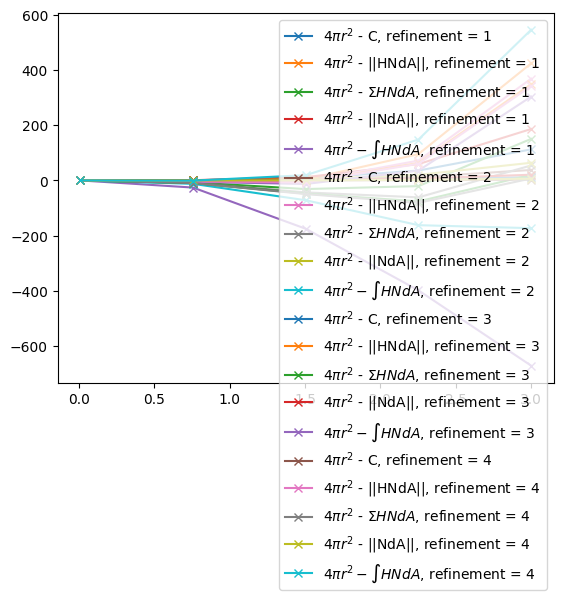

In [36]:
from matplotlib import pyplot as plt

refinement = 2
refinement_list = [1, 2, 3, 4]
#refinement_list = [2]
r_range = np.linspace(1e-2, 3, 5)
for refinement in refinement_list:
    C_list = []
    n_hndA_list = []
    s_hndA_list = []
    int_hndA_list = []
    NdA_list = []
    Omega_list = []
    for r in r_range:
        # Start main loop
        HC = sphere_from_cap(r, N=N, refinement=refinement)
        HNdA_ijk_l, C_ijk_l = [], []
        int_hndA = []
        C = 0
        HNdA = np.zeros(3)
        for v in HC.V:
            n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            n_i = normalized(n_i)[0]  
            n_test = n_i + (np.random.rand(3) - 0.5)
            HNdA_i, C_i = hndA_i(v, n_i=n_test)
            #v.hnda_i = HNdA_i
            v.hnda_i = np.abs(HNdA_i)
            C += C_i
            HNdA += np.abs(HNdA_i)
            #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
            #break
        for v in HC.V:
            int_HNdA_i, C_i = int_hndA_i(v, n_i=None)
            #int_HNdA_i =-np.array(int_HNdA_i)
            int_hndA.append(int_HNdA_i)
            int_hndA.append(np.abs(int_HNdA_i))

        int_hndA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(int_hndA, axis=1)))/4*np.pi*r**2)
        n_hndA_list.append((4*np.pi*r**2 - np.linalg.norm(HNdA))/4*np.pi*r**2)
        s_hndA_list.append((4*np.pi*r**2 - np.sum(HNdA))/4*np.pi*r**2)
        # Compute the curvature
      #  HNdA_i = []  # total HNdA_i at vertex i
        A_ijk = []  # total HNdA_i for edge ij
        C_ij = []
        alpha_ij = []
        NdA_i = []
        Omega_i = []
        for v in HC.V:
            #print(f'v.index = {v.index}')
            N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            N_f0 = normalized(N_f0)[0]
            F, nn = vectorise_vnn(v)
            # Compute discrete curvatures
            c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            # Append lists
          #  c_outd['HNdA_ij']
          #  HNdA_i.append(c_outd['HNdA_i'])
            C_ij.append(c_outd['C_ij'])
            alpha_ij.append(c_outd['alpha_ij'])
            A_ijk.append(c_outd['A_ijk'])
            #print(f'N_f0 dot = {N_f0}')
          #  np.dot(N_f0, c_outd['HNdA_i'])
            NdA_i.append(c_outd['NdA_i'])
            Omega_i.append(2 * np.pi - np.sum(c_outd['Theta_i_jk']))


        NdA_i = np.abs(np.array(NdA_i))
        C_list.append((4*np.pi*r**2 - C)/4*np.pi*r**2)
        NdA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(NdA_i, axis=1)))/4*np.pi*r**2)
       # NdA_list.append((4*np.pi*r**2 - np.sum(NdA_i, axis=1))/4*np.pi*r**2)
        Omega_list.append((4*np.pi*r**2 - np.sum(Omega_i))/4*np.pi*r**2)
        

    labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
    plt.plot(r_range, C_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - ||HNdA||' + f', refinement = {refinement}'
    plt.plot(r_range, n_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - $\Sigma HNdA$' + f', refinement = {refinement}'
    plt.plot(r_range, s_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
    plt.plot(r_range, NdA_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
    #plt.plot(r_range, Omega_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
    plt.plot(r_range, int_hndA_list, 'x-', label=labstr)
    plt.legend()

plt.show()

In [31]:
C, np.sum(HNdA)

(112.66671827187164622, 112.07318458940156)

In [42]:
4*np.pi*r**2, C, np.sum(HNdA), np.linalg.norm(HNdA), np.sum(NdA_i), np.sum(np.linalg.norm(NdA_i, axis=1))

(113.09733552923255,
 112.66671827187164622,
 112.07318458940156,
 64.70645015751062,
 167.1945469887091622,
 112.19558067132385347)

In [44]:
np.sum(np.linalg.norm(int_hndA, axis=1)), np.sum(int_hndA)

(35.797422488507706, 24.799153829119525)

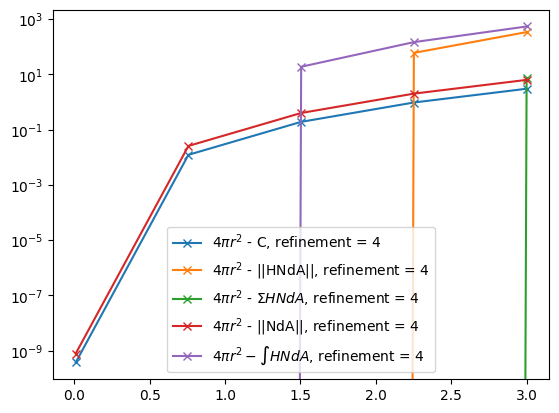

In [37]:
labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
plt.semilogy(r_range, C_list, 'x-', label=labstr)
labstr = r'$4\pi r^2$ - ||HNdA||' + f', refinement = {refinement}'
plt.semilogy(r_range, n_hndA_list, 'x-', label=labstr)
labstr = r'$4\pi r^2$ - $\Sigma HNdA$' + f', refinement = {refinement}'
plt.semilogy(r_range, s_hndA_list, 'x-', label=labstr)
labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
plt.semilogy(r_range, NdA_list, 'x-', label=labstr)
#labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
#plt.plot(r_range, Omega_list, 'x-', label=labstr)
labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
plt.semilogy(r_range, int_hndA_list, 'x-', label=labstr)
plt.legend()


### Insight: Norms seem to be pretty bad for $HNdA$, while working better for $NdA$ estimates

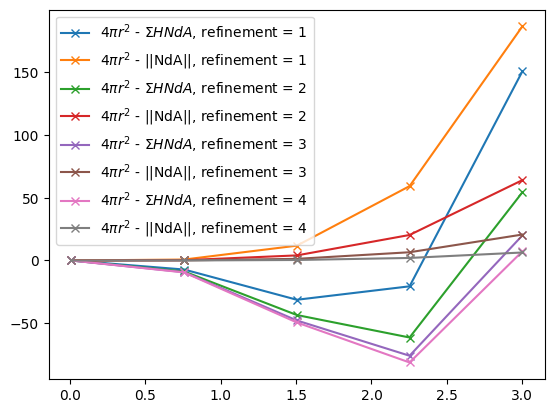

In [53]:
from matplotlib import pyplot as plt

refinement = 2
refinement_list = [1, 2, 3, 4]
#refinement_list = [2]
r_range = np.linspace(1e-2, 3, 5)
for refinement in refinement_list:
    C_list = []
    n_hndA_list = []
    s_hndA_list = []
    int_hndA_list = []
    NdA_list = []
    Omega_list = []
    for r in r_range:
        # Start main loop
        HC = sphere_from_cap(r, N=N, refinement=refinement)
        HNdA_ijk_l, C_ijk_l = [], []
        int_hndA = []
        C = 0
        HNdA = np.zeros(3)
        for v in HC.V:
            n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            n_i = normalized(n_i)[0]  
            n_test = n_i + (np.random.rand(3) - 0.5)
            HNdA_i, C_i = hndA_i(v, n_i=n_test)
            #v.hnda_i = HNdA_i
            v.hnda_i = np.abs(HNdA_i)
            C += C_i
            HNdA += np.abs(HNdA_i)
            #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
            #break
        for v in HC.V:
            int_HNdA_i, C_i = int_hndA_i(v, n_i=None)
            #int_HNdA_i =-np.array(int_HNdA_i)
            int_hndA.append(int_HNdA_i)
            int_hndA.append(np.abs(int_HNdA_i))

        int_hndA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(int_hndA, axis=1)))/4*np.pi*r**2)
        s_hndA_list.append((4*np.pi*r**2 - np.sum(HNdA))/4*np.pi*r**2)
        # Compute the curvature
      #  HNdA_i = []  # total HNdA_i at vertex i
        A_ijk = []  # total HNdA_i for edge ij
        C_ij = []
        alpha_ij = []
        NdA_i = []
        Omega_i = []
        for v in HC.V:
            #print(f'v.index = {v.index}')
            N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            N_f0 = normalized(N_f0)[0]
            F, nn = vectorise_vnn(v)
            # Compute discrete curvatures
            c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            # Append lists
          #  c_outd['HNdA_ij']
          #  HNdA_i.append(c_outd['HNdA_i'])
            C_ij.append(c_outd['C_ij'])
            alpha_ij.append(c_outd['alpha_ij'])
            A_ijk.append(c_outd['A_ijk'])
            #print(f'N_f0 dot = {N_f0}')
          #  np.dot(N_f0, c_outd['HNdA_i'])
            NdA_i.append(c_outd['NdA_i'])
            Omega_i.append(2 * np.pi - np.sum(c_outd['Theta_i_jk']))


        NdA_i = np.abs(np.array(NdA_i))
        C_list.append((4*np.pi*r**2 - C)/4*np.pi*r**2)
        #print(f'np.sum(np.linalg.norm(NdA_i, axis=1) = {np.sum(np.linalg.norm(NdA_i, axis=1))}')
        NdA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(NdA_i, axis=1)))/4*np.pi*r**2)
       # NdA_list.append((4*np.pi*r**2 - np.sum(NdA_i, axis=1))/4*np.pi*r**2)
        Omega_list.append((4*np.pi*r**2 - np.sum(Omega_i))/4*np.pi*r**2)
        

   # labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
   # plt.plot(r_range, C_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2$ - ||HNdA||' + f', refinement = {refinement}'
    #plt.plot(r_range, n_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - $\Sigma HNdA$' + f', refinement = {refinement}'
    plt.plot(r_range, s_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
    plt.plot(r_range, NdA_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
    #plt.plot(r_range, Omega_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
    #plt.plot(r_range, int_hndA_list, 'x-', label=labstr)
    plt.legend()

plt.show()

In [48]:
4*np.pi*r**2, C, np.sum(HNdA), np.sum(np.linalg.norm(NdA_i, axis=1))

(113.09733552923255,
 112.66671827187164622,
 112.07318458940156,
 112.19558067132385347)

IndexError: list index out of range

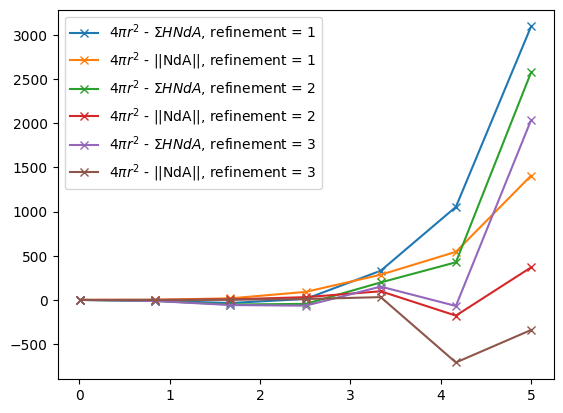

In [59]:
from matplotlib import pyplot as plt

refinement = 2
refinement_list = [1, 2, 3, 4]
#refinement_list = [2]
r_range = np.linspace(1e-2, 5, 7)
for refinement in refinement_list:
    C_list = []
    n_hndA_list = []
    s_hndA_list = []
    int_hndA_list = []
    NdA_list = []
    Omega_list = []
    for r in r_range:
        # Start main loop
        HC = sphere_from_cap(r, N=N, refinement=refinement)
        HNdA_ijk_l, C_ijk_l = [], []
        int_hndA = []
        C = 0
        HNdA = np.zeros(3)
        for v in HC.V:
            n_i = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            n_i = normalized(n_i)[0]  
            n_test = n_i + (np.random.rand(3) - 0.5)
            HNdA_i, C_i = hndA_i(v, n_i=n_test)
            #v.hnda_i = HNdA_i
            v.hnda_i = np.abs(HNdA_i)
            C += C_i
            HNdA += np.abs(HNdA_i)
            #print(f"np.dot(n_i, HNdA_i)/C_i, n_i, HNdA_i = {np.dot(n_i, HNdA_i)/C_i}")
            #break
       # for v in HC.V:
       #     int_HNdA_i, C_i = int_hndA_i(v, n_i=None)
       #     #int_HNdA_i =-np.array(int_HNdA_i)
       #     int_hndA.append(int_HNdA_i)
       #     int_hndA.append(np.abs(int_HNdA_i))

       # int_hndA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(int_hndA, axis=1)))/4*np.pi*r**2)
        s_hndA_list.append((4*np.pi*r**2 - np.sum(HNdA))/4*np.pi*r**2)
        # Compute the curvature
      #  HNdA_i = []  # total HNdA_i at vertex i
        A_ijk = []  # total HNdA_i for edge ij
        C_ij = []
        alpha_ij = []
        NdA_i = []
        Omega_i = []
        for v in HC.V:
            #print(f'v.index = {v.index}')
            N_f0 = v.x_a - np.array([0.0, 0.0, 0.0])  # First approximation
            N_f0 = normalized(N_f0)[0]
            F, nn = vectorise_vnn(v)
            # Compute discrete curvatures
            c_outd = b_curvatures_hn_ij_c_ij(F, nn, n_i=N_f0)
            # Append lists
          #  c_outd['HNdA_ij']
          #  HNdA_i.append(c_outd['HNdA_i'])
            C_ij.append(c_outd['C_ij'])
            alpha_ij.append(c_outd['alpha_ij'])
            A_ijk.append(c_outd['A_ijk'])
            #print(f'N_f0 dot = {N_f0}')
          #  np.dot(N_f0, c_outd['HNdA_i'])
            NdA_i.append(c_outd['NdA_i'])
            Omega_i.append(2 * np.pi - np.sum(c_outd['Theta_i_jk']))


        NdA_i = np.abs(np.array(NdA_i))
        C_list.append((4*np.pi*r**2 - C)/4*np.pi*r**2)
        #print(f'np.sum(np.linalg.norm(NdA_i, axis=1) = {np.sum(np.linalg.norm(NdA_i, axis=1))}')
        NdA_list.append((4*np.pi*r**2 - np.sum(np.linalg.norm(NdA_i, axis=1)))/4*np.pi*r**2)
       # NdA_list.append((4*np.pi*r**2 - np.sum(NdA_i, axis=1))/4*np.pi*r**2)
        Omega_list.append((4*np.pi*r**2 - np.sum(Omega_i))/4*np.pi*r**2)
        

   # labstr = r'$4\pi r^2$ - C' + f', refinement = {refinement}'
   # plt.plot(r_range, C_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2$ - ||HNdA||' + f', refinement = {refinement}'
    #plt.plot(r_range, n_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - $\Sigma HNdA$' + f', refinement = {refinement}'
    plt.plot(r_range, s_hndA_list, 'x-', label=labstr)
    labstr = r'$4\pi r^2$ - ||NdA||' + f', refinement = {refinement}'
    plt.plot(r_range, NdA_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \Omega$' + f', refinement = {refinement}'
    #plt.plot(r_range, Omega_list, 'x-', label=labstr)
    #labstr = r'$4\pi r^2 - \int HNdA$' + f', refinement = {refinement}'
    #plt.plot(r_range, int_hndA_list, 'x-', label=labstr)
    plt.legend()

plt.show()